# Nonlinear BVP using finite difference method

Conside the BVP
$$
y'' - 2 \frac{(y')^2}{y} + y = 0, \qquad x \in (-1,+1)
$$
with boundary conditions
$$
y(-1) = y(1) = \frac{1}{e + e^{-1}}
$$
The exact solution is given by
$$
y(x) = \frac{1}{\exp(x) + \exp(-x)}
$$

## Finite difference method

Make a uniform grid of $n+1$ points such that
$$
x_j = -1 + j h, \qquad 0 \le j \le n, \qquad h = 2/n
$$
Then we approximate the differential equation by finite differences
$$
\phi_j = \frac{y_{j-1}-2y_j + y_{j+1}}{h^2} - \frac{2}{y_j} \left(\frac{y_{j+1} - y_{j-1}}{2h}\right)^2 + y_j = 0, \quad 1 \le j \le n-1
$$
with the boundary condition
$$
y_0 = y_n = \frac{1}{e + e^{-1}}
$$
This is a non-linear system of equations. We can eliminate $y_0, y_n$ and form a problem to find the remaining unknowns. Define
$$
Y = [y_1, \ldots, y_{n-1}], \qquad \phi = [\phi_1, \ldots, \phi_{n-1}]
$$
Then $\phi = \phi(Y)$ is a map from $R^{n-1}$ to $R^{n-1}$. The Newton method is given by
$$
\phi'(Y^k) \delta Y^k = - \phi(Y^k), \qquad Y^{k+1} = Y^k + \delta Y^k
$$
The Jacobian is given by
$$
[\phi']_{jl} = \frac{\partial \phi_j}{\partial y_l}, \quad 1 \le j,l \le n-1
$$

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def yexact(x):
    return 1.0/(np.exp(x)+np.exp(-x))

def phi(y):
    n   = len(y) - 1
    h   = 2.0/n
    res = np.zeros(n-1)
    for i in range(1,n):
        dy = (y[i+1] - y[i-1])/(2.0*h)
        res[i-1] = (y[i-1]-2.0*y[i]+y[i+1])/h**2 - 2*dy**2/y[i] + y[i]
    return res
        
def dphi(y):
    n   = len(y) - 1
    h   = 2.0/n
    res = np.zeros((n-1,n-1))
    for i in range(1,n):
        dy = (y[i+1] - y[i-1])/(2.0*h)
        if i > 1:
            res[i-1,i-2] = 1.0/h**2 + 4.0*dy/y[i]
        res[i-1,i-1] =-2.0/h**2 + 1.0 - 2.0*(dy/y[i])**2
        if i < n-1:
            res[i-1,i  ] = 1.0/h**2 - 4.0*dy/y[i]
    return res

We now solve the problem with Newton method.

Number of iterations = 13


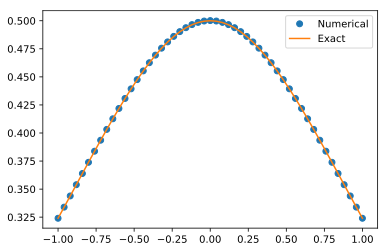

In [24]:
n = 50

# Initial guess for y
y = np.zeros(n+1)
y[:] = 1.0/(np.exp(1) + np.exp(-1))

maxiter = 100
TOL = 1.0e-6
it = 0
while it < maxiter:
    b = -phi(y)
    if np.linalg.norm(b) < TOL:
        break
    A = dphi(y)
    v = np.linalg.solve(A,b)
    y[1:n] = y[1:n] + v
    it += 1
print("Number of iterations = %d" % it)
x = np.linspace(-1.0,1.0,n+1)
plt.plot(x,y,'o',x,yexact(x))
plt.legend(("Numerical","Exact"));